#### 2.	Produce descriptive statistics and plots describing the individual variables and their pairwise associations with one another. Pay particular attention to the associations of income and annual savings with all other variables. Comment on the results. Is there anything particularly interesting? Is there anything that doesn’t make sense? 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [16]:
df_clean = pd.read_pickle('data/customer_data_modified.pkl')

In [17]:
df = df_clean.drop(columns=['cust_unique_id', 'gender', 'ethnicity_group', 'geo_region'])


<table>
<tr>
<th>gender</th>
<th>ethnicity group</th>
<th> geo region </th>
</tr>
<tr>
<td>

```
9999     0
F        1
M        2
Other    3 
```
</td>
<td>


```
Afro-Carribbean    0
Other              1
South Asian        2
White British      3
White Other        4
```
</td>
<td>

```
Midlands     0
North        1
Scotland     2
Southeast    3
Southwest    4
Wales        5
```
</td>
</tr>
</table>

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4972 entries, 7 to 30304
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4972 non-null   int64  
 1   gender_cat              4972 non-null   int64  
 2   ethnicity_group_cat     4972 non-null   int64  
 3   geo_region_cat          4972 non-null   int64  
 4   net_salary              4972 non-null   float64
 5   other_income            4972 non-null   float64
 6   observed_income         4972 non-null   float64
 7   housing_spend           4972 non-null   float64
 8   childcare_spend         4972 non-null   float64
 9   gambling_spend          4972 non-null   float64
 10  observed_surplus        4972 non-null   float64
 11  credit_score            4972 non-null   float64
 12  savings_bal_lbg         4972 non-null   float64
 13  annual_net_savings_lbg  4972 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 582.7

In [19]:
df[df['credit_score'] == 0]

,age,gender_cat,ethnicity_group_cat,geo_region_cat,net_salary,other_income,observed_income,housing_spend,childcare_spend,gambling_spend,observed_surplus,credit_score,savings_bal_lbg,annual_net_savings_lbg
61,51,1,4,2,41125.50,0.00,41125.50,14678.22,0.0,0.0,26447.28,0.0,637554.32,21123.66
135,53,1,3,4,46674.36,8342.03,55016.39,18670.28,0.0,0.0,36346.11,0.0,968023.81,21570.31
225,65,1,3,2,54042.34,10230.08,64272.42,19269.56,0.0,0.0,45002.86,0.0,1725666.11,30443.67
398,36,1,2,2,40642.38,0.00,40642.38,15449.42,0.0,0.0,25192.96,0.0,255950.51,16376.26
400,40,1,3,3,65618.51,16587.72,82206.23,29187.14,0.0,0.0,53019.09,0.0,774717.48,27363.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28659,61,1,3,2,51774.50,11948.40,63722.90,20513.90,0.0,0.0,43209.00,0.0,1483799.23,30254.88
28911,21,2,3,2,53657.34,12540.53,66197.87,26943.59,0.0,0.0,39254.28,0.0,0.00,17394.14
29311,47,2,2,0,46034.15,7061.68,53095.83,19887.36,0.0,0.0,33208.47,0.0,691553.85,20511.21
29441,21,2,2,2,43100.18,0.00,43100.18,20251.57,0.0,0.0,22848.61,0.0,0.00,0.00


In [20]:
# get a list of numerical and categorical variables
num_cols = list(df.select_dtypes('float64'))
num_cols.append('age')
print(num_cols)
cat_cols = list(df.select_dtypes('int64'))
cat_cols.remove('age')
print(cat_cols)
                

['net_salary', 'other_income', 'observed_income', 'housing_spend', 'childcare_spend', 'gambling_spend', 'observed_surplus', 'credit_score', 'savings_bal_lbg', 'annual_net_savings_lbg', 'age']
['gender_cat', 'ethnicity_group_cat', 'geo_region_cat']


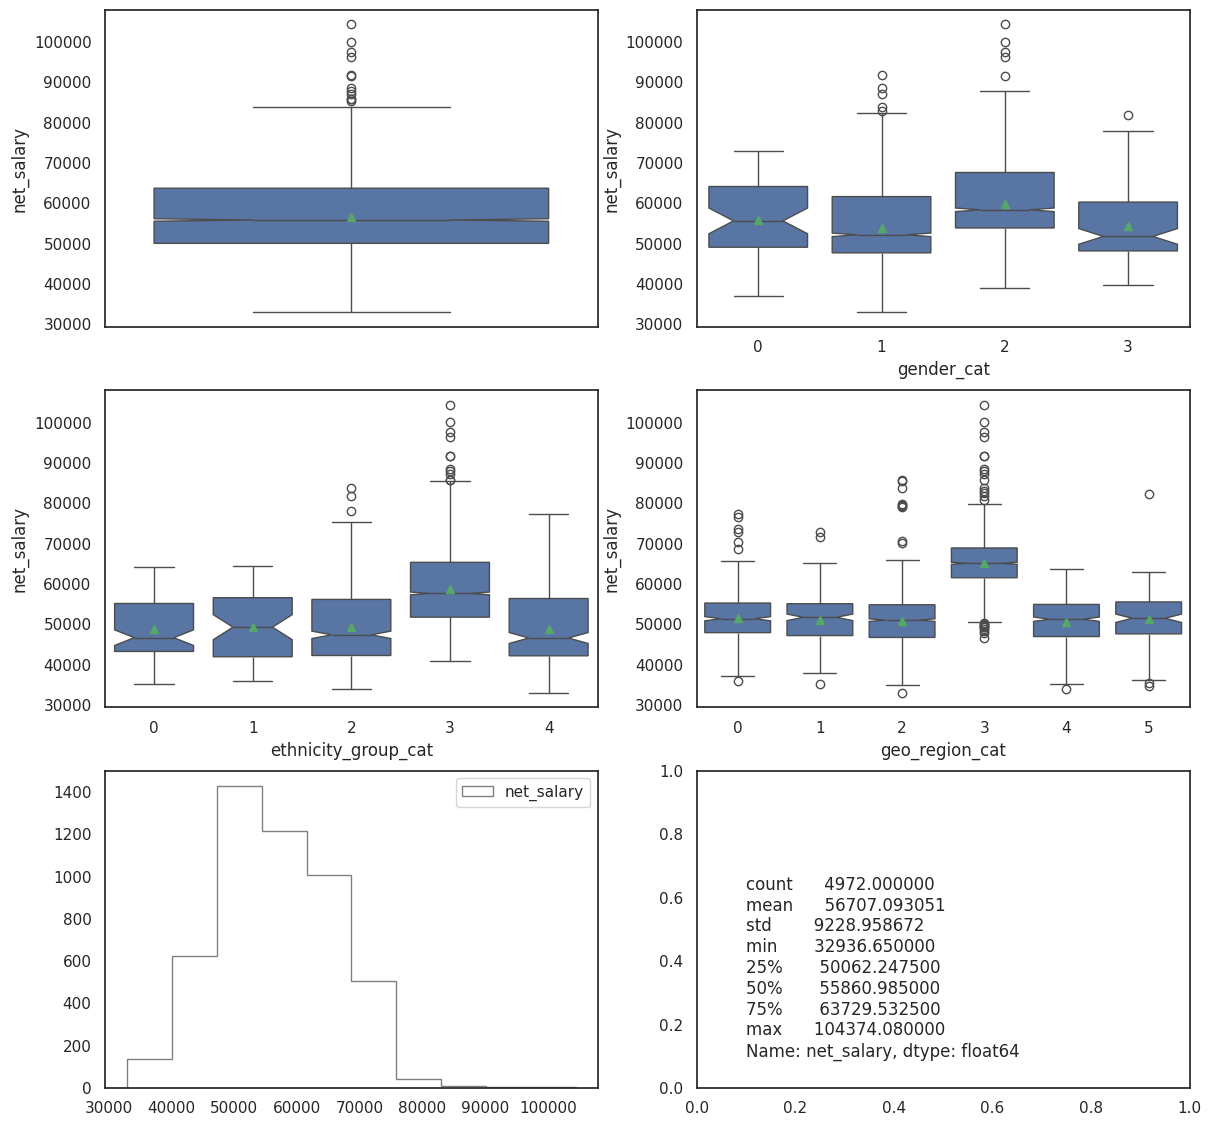

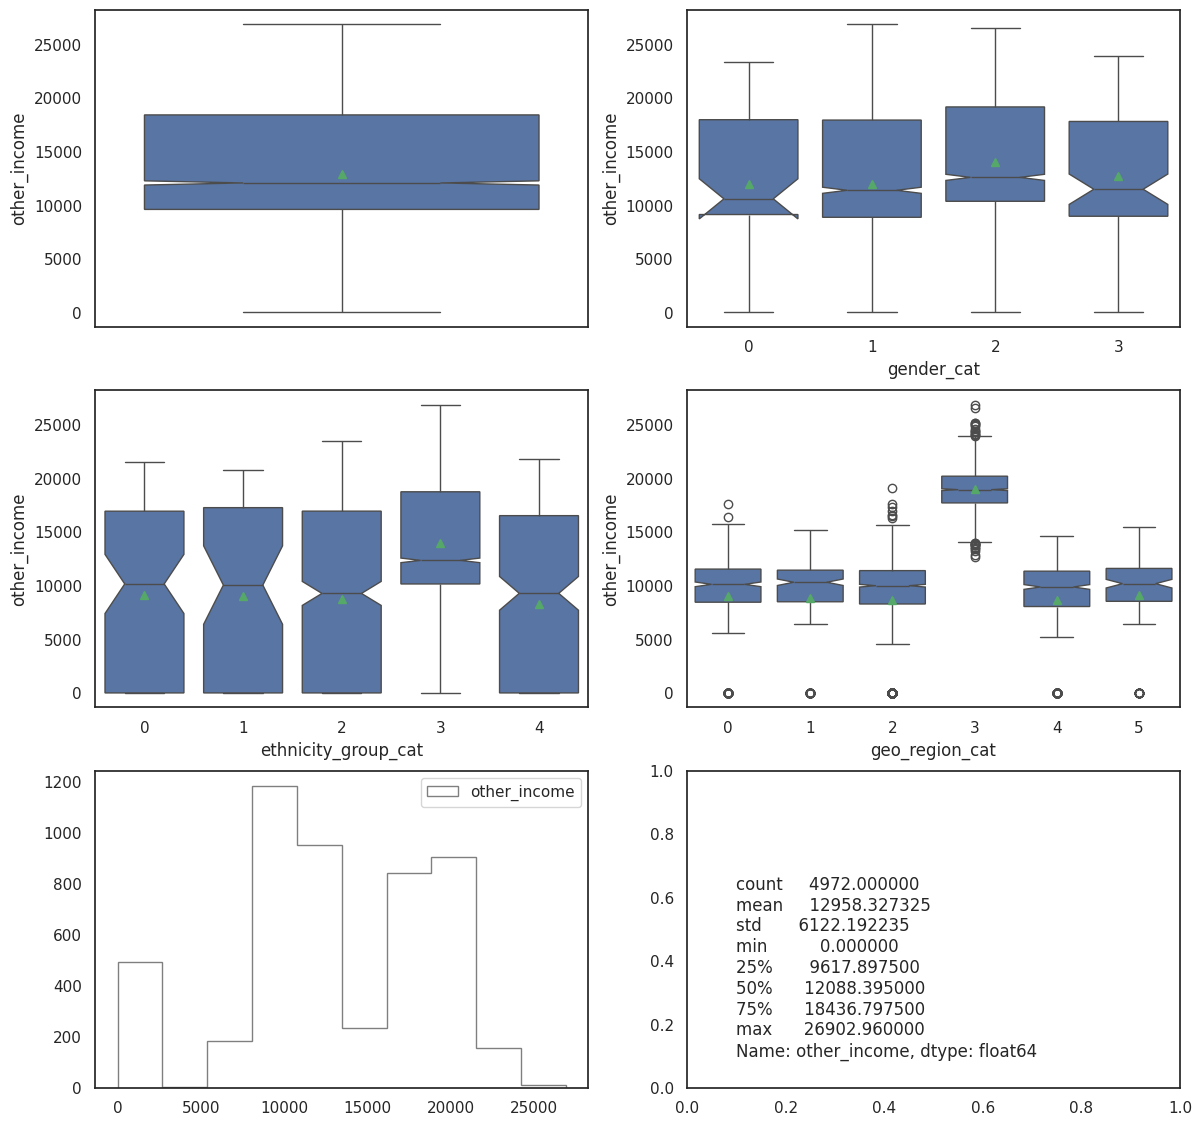

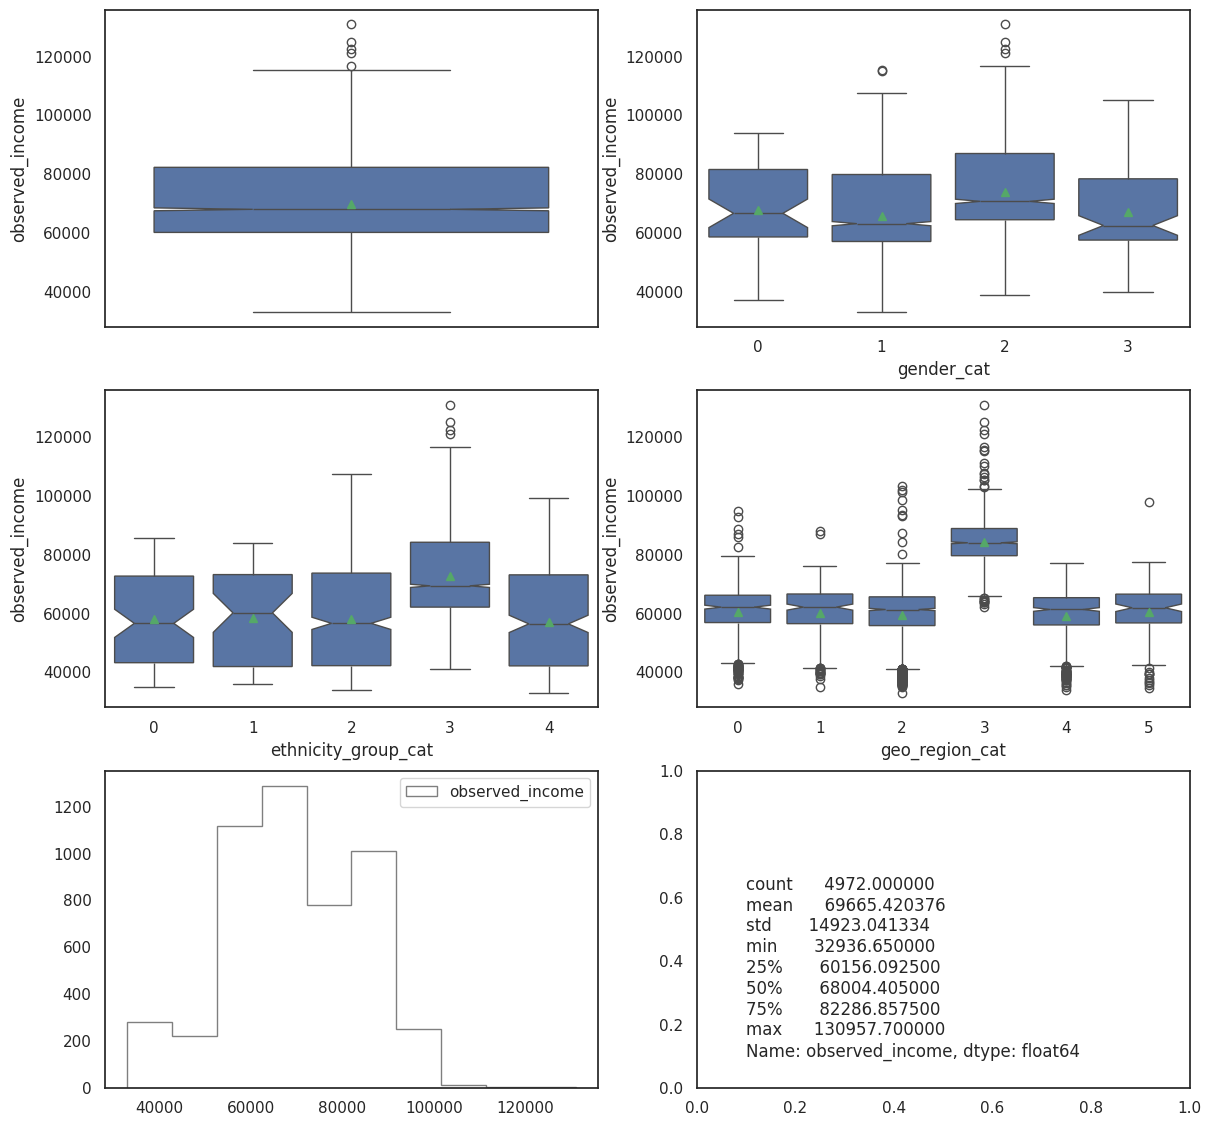

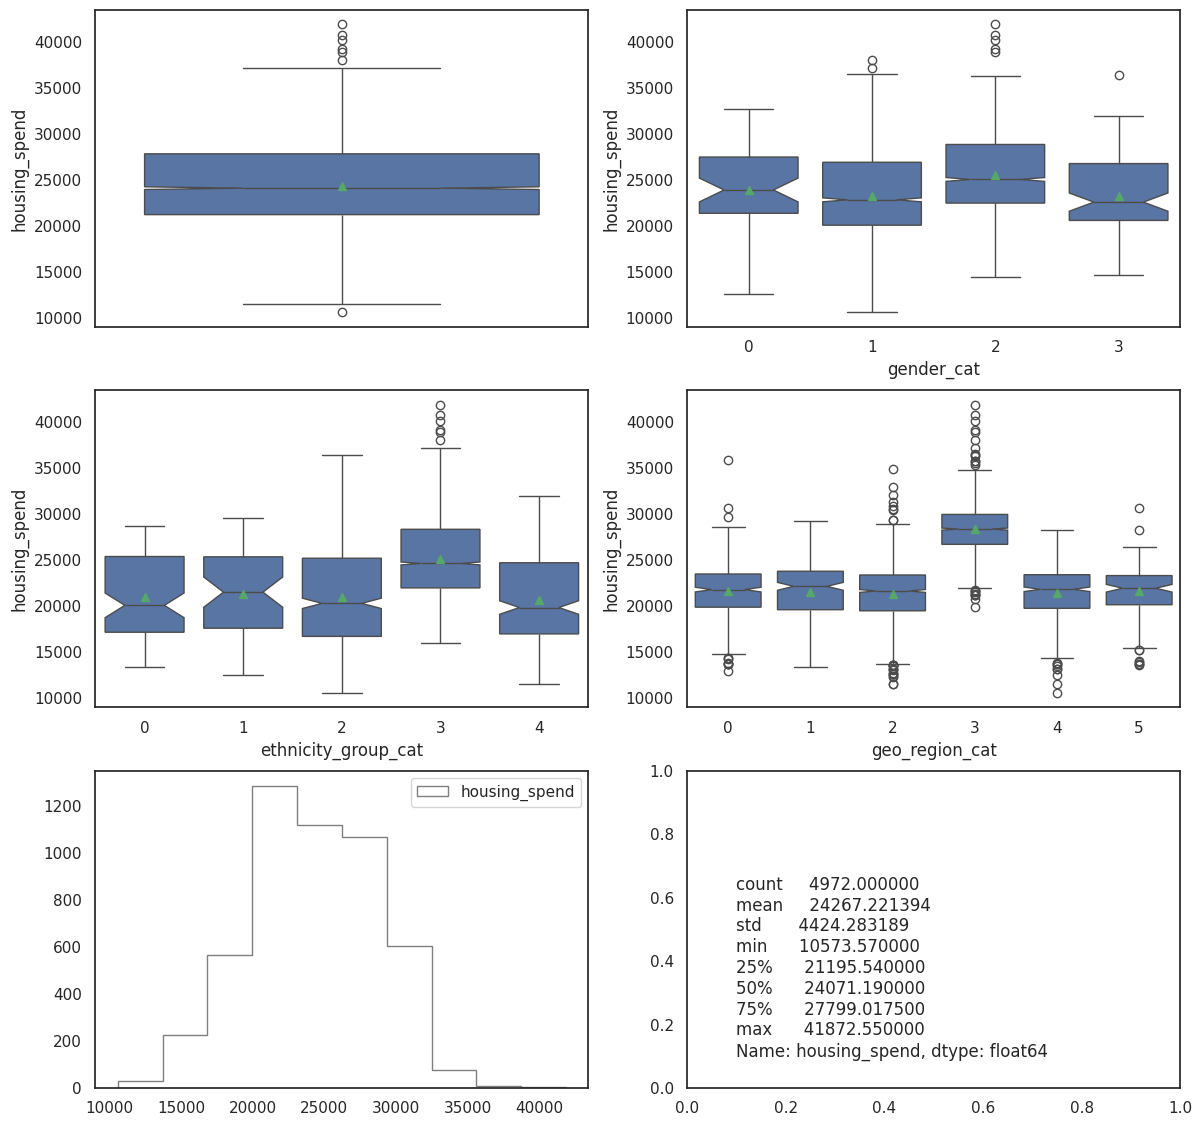

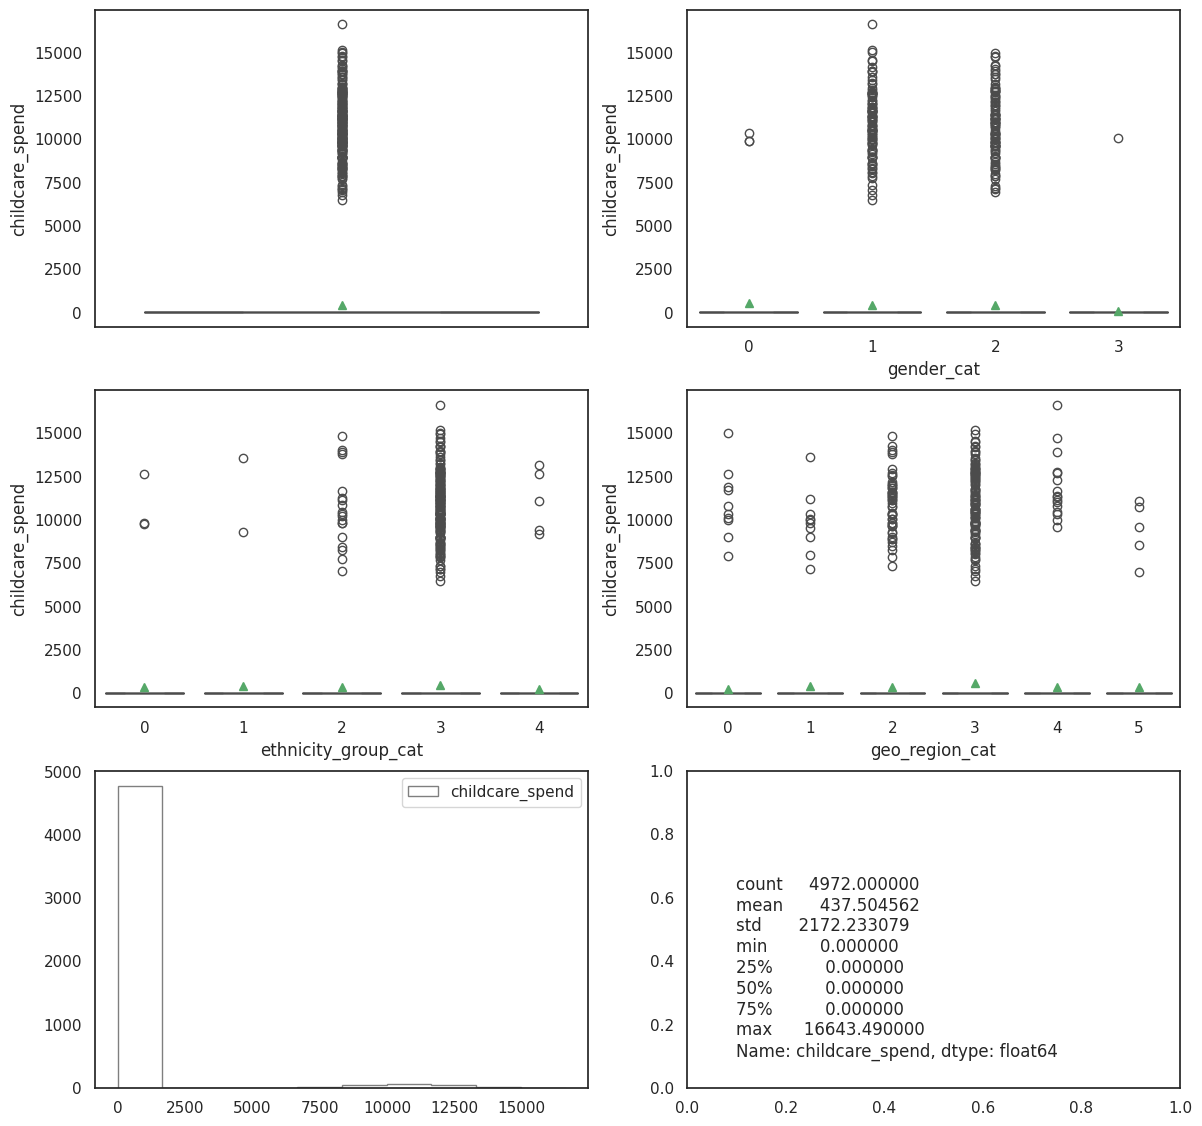

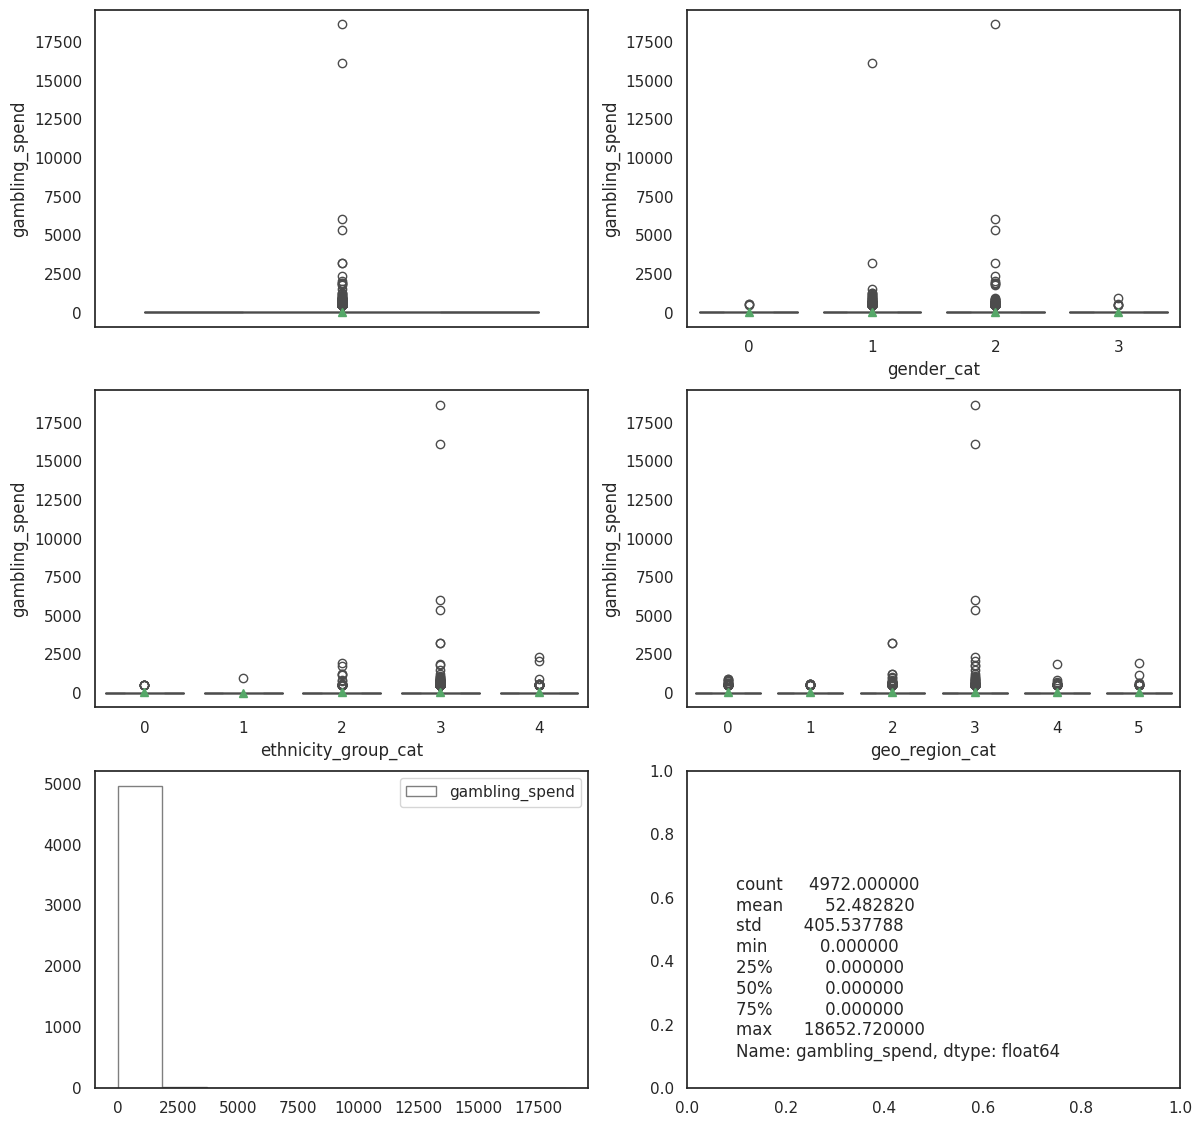

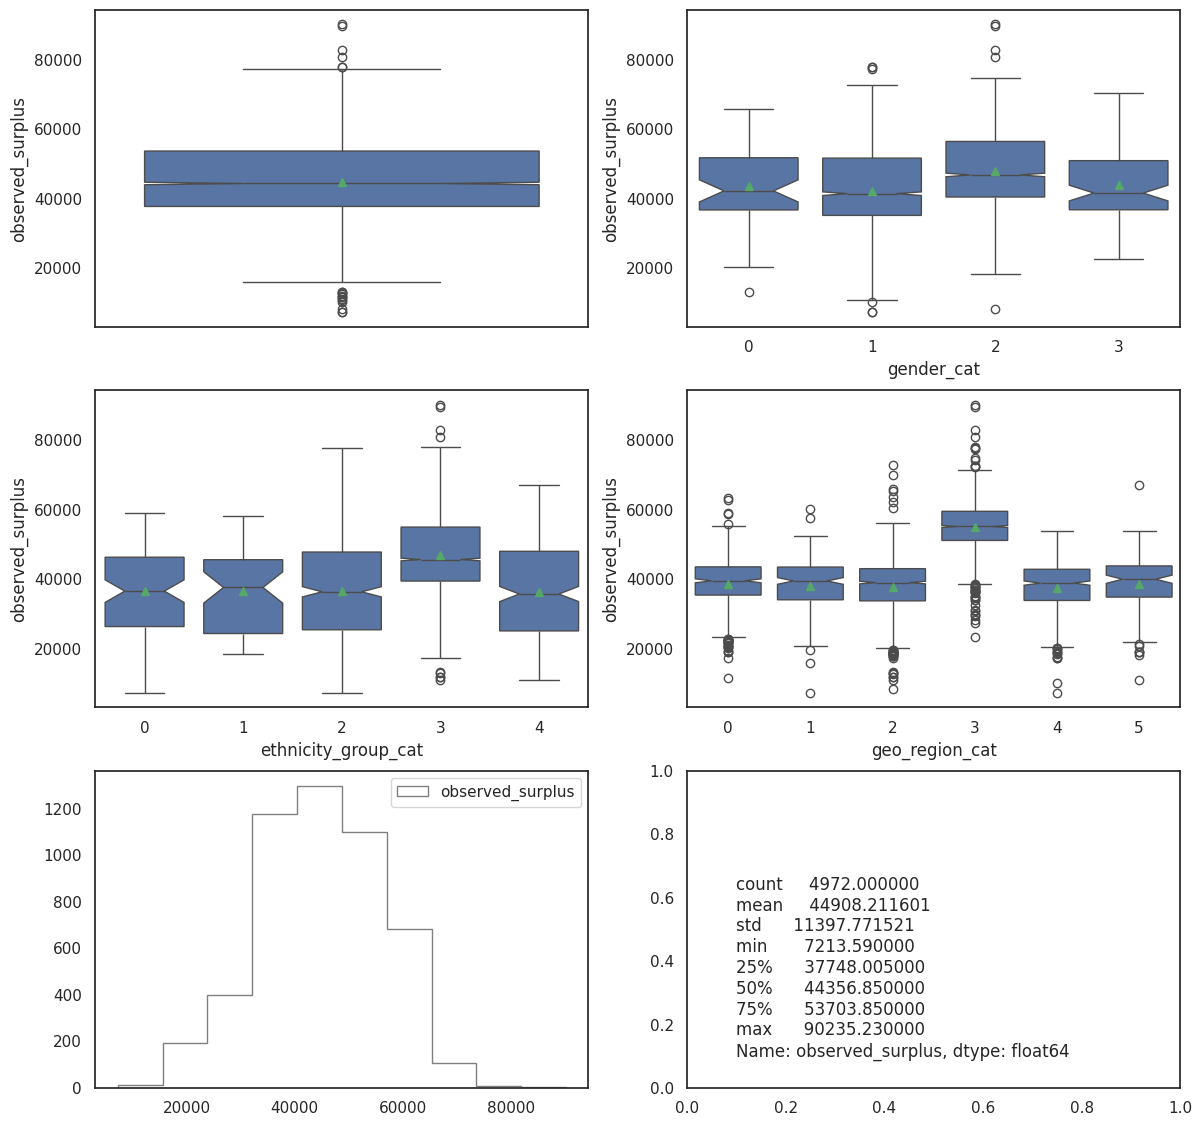

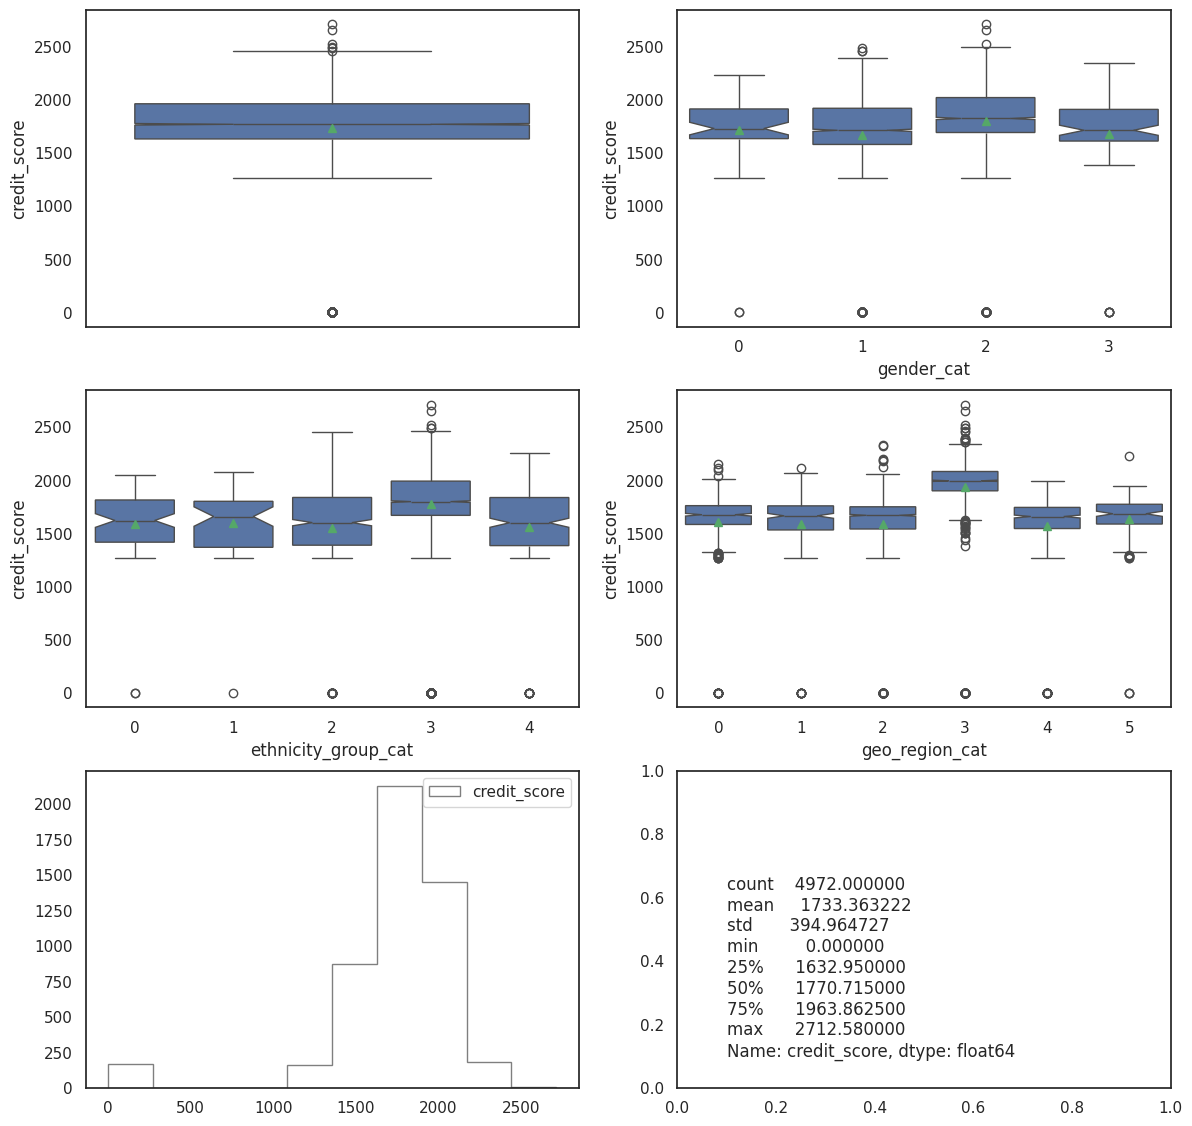

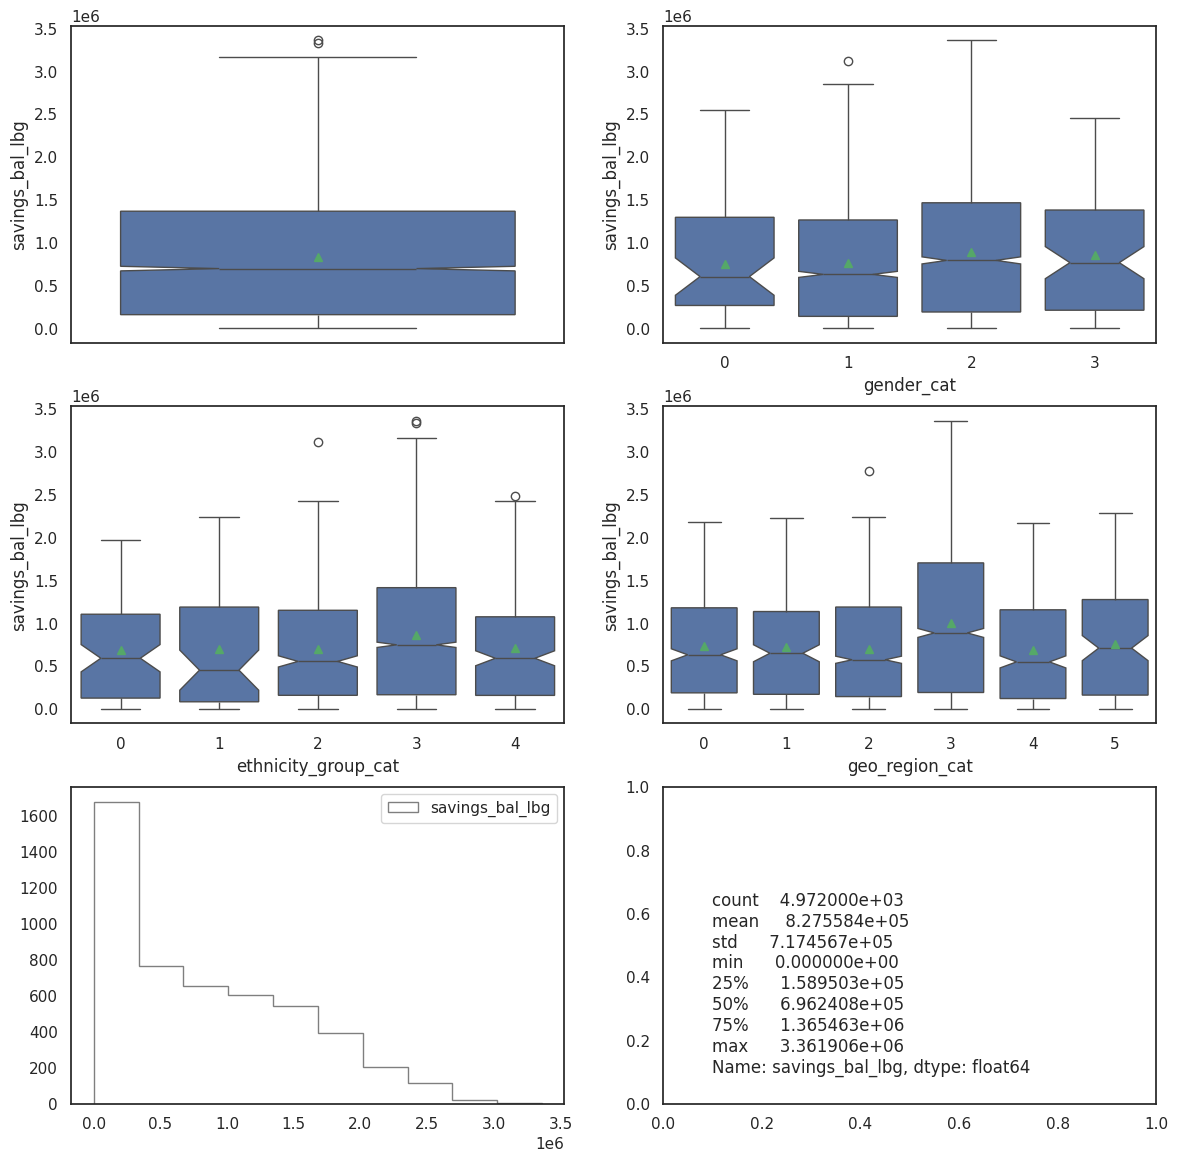

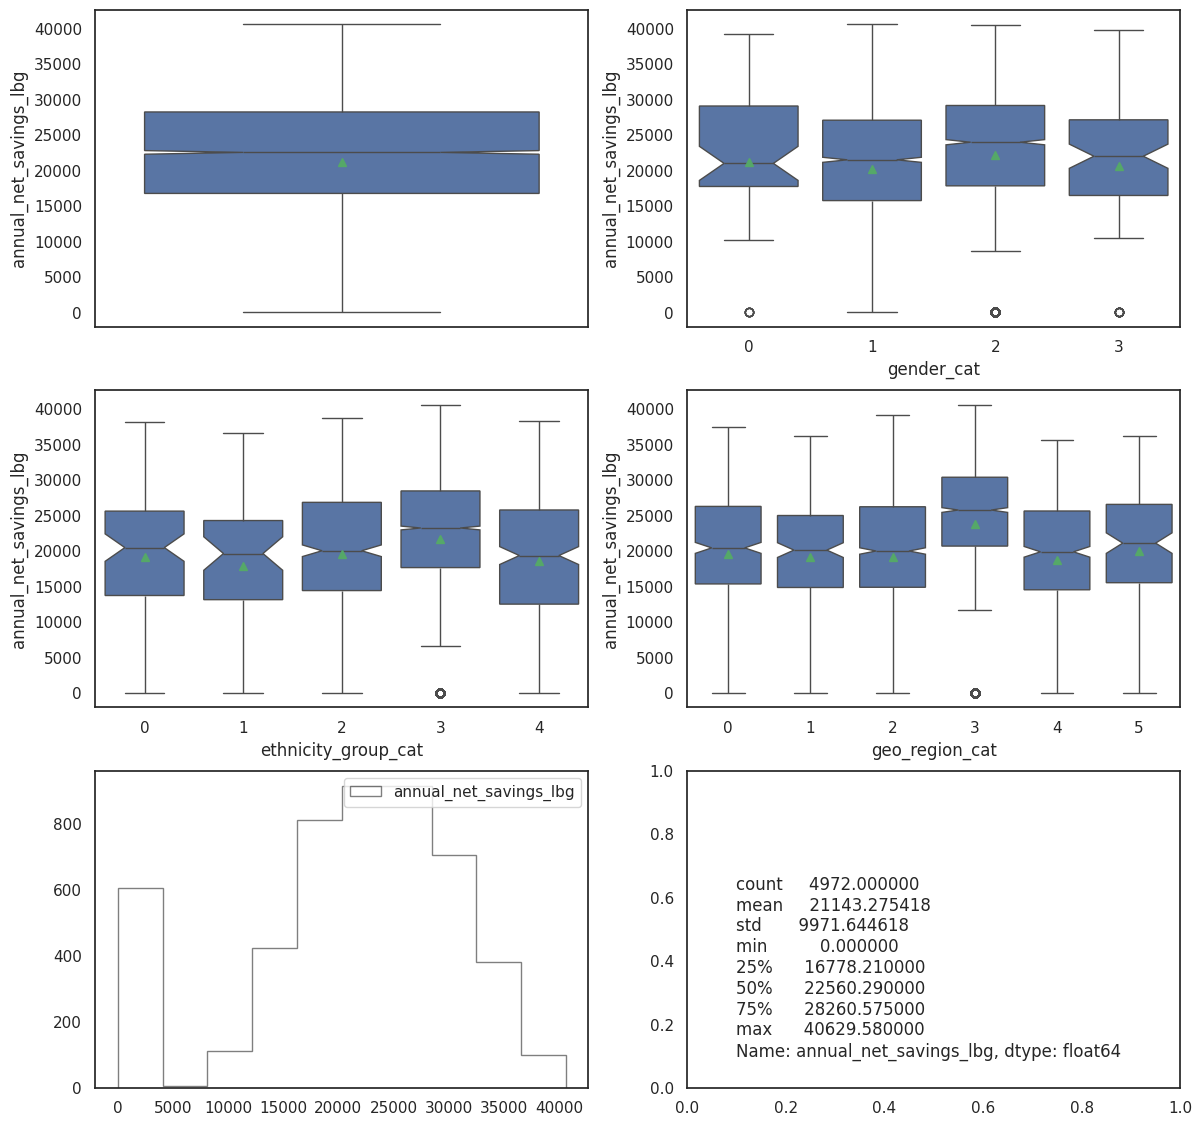

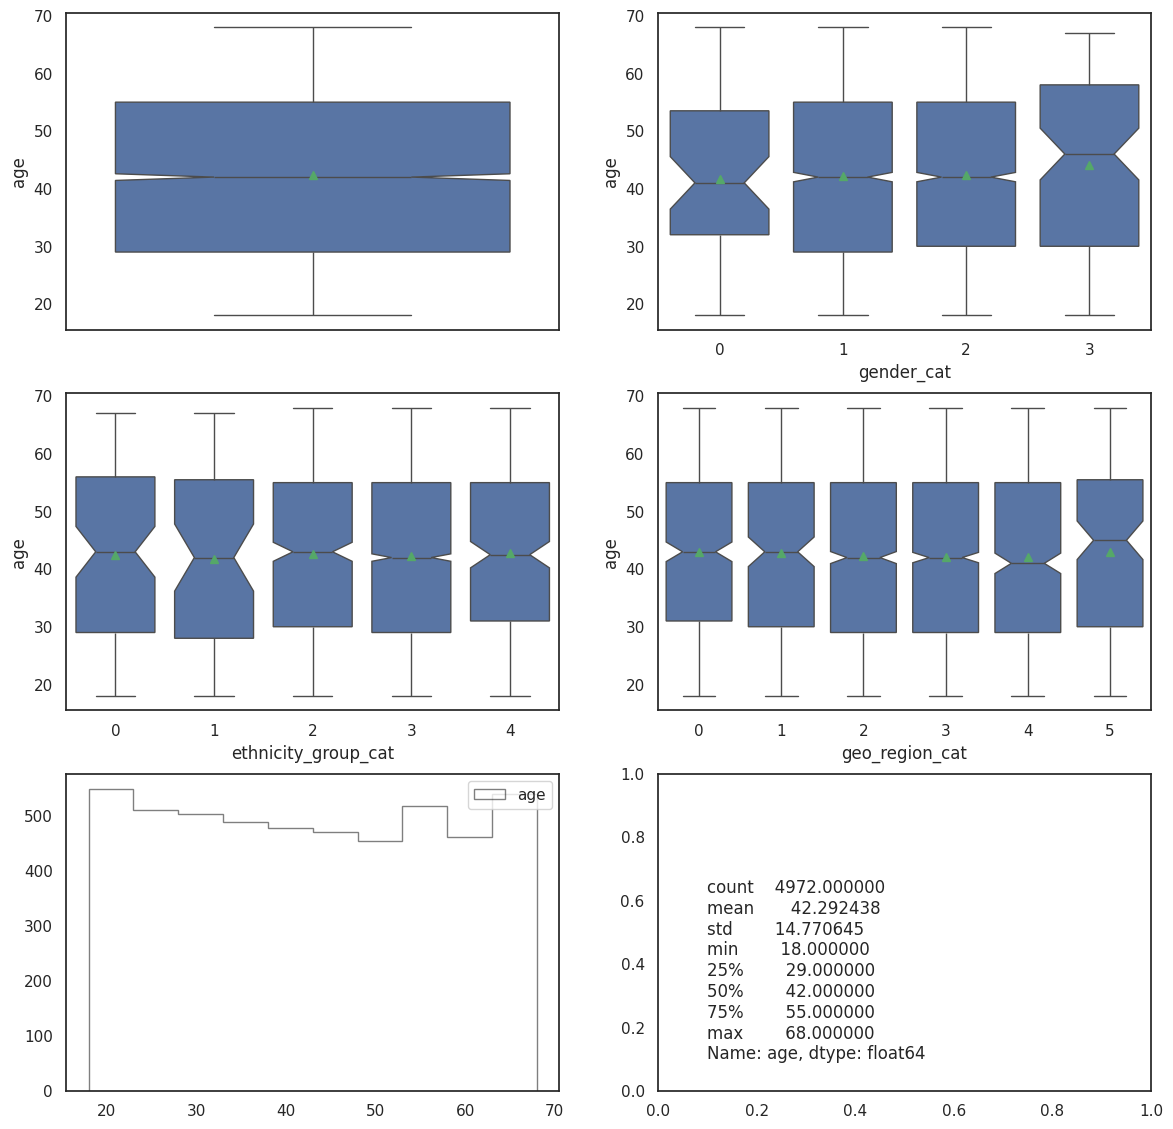

In [21]:
# lets take a look at the variability of the numerical vairables - combined & seperated in categories 
for col in num_cols:
    plt.figure(figsize=(14,14))
    plt.tight_layout()
    sns.set(style='white')
    plt.subplot(321)
    sns.boxplot(y=df[col], notch=True, showmeans=True)
    plt.subplot(322)
    sns.boxplot(y=df[col], x = df['gender_cat'], notch=True, showmeans=True)
    plt.subplot(323)
    sns.boxplot(y=df[col], x = df['ethnicity_group_cat'], notch=True, showmeans=True)
    plt.subplot(324)
    sns.boxplot(y=df[col], x = df['geo_region_cat'], notch=True, showmeans=True)
    plt.subplot(325)
    plt.hist(df[col], density=False, alpha=0.5, label=col,histtype='step', stacked=True, color='black')
    plt.legend(loc='upper right')
    plt.subplot(326)
    plt.text(0.1, 0.1, f"{df[col].describe()}")
    # plt.legend(loc='upper right')
    

<Axes: >

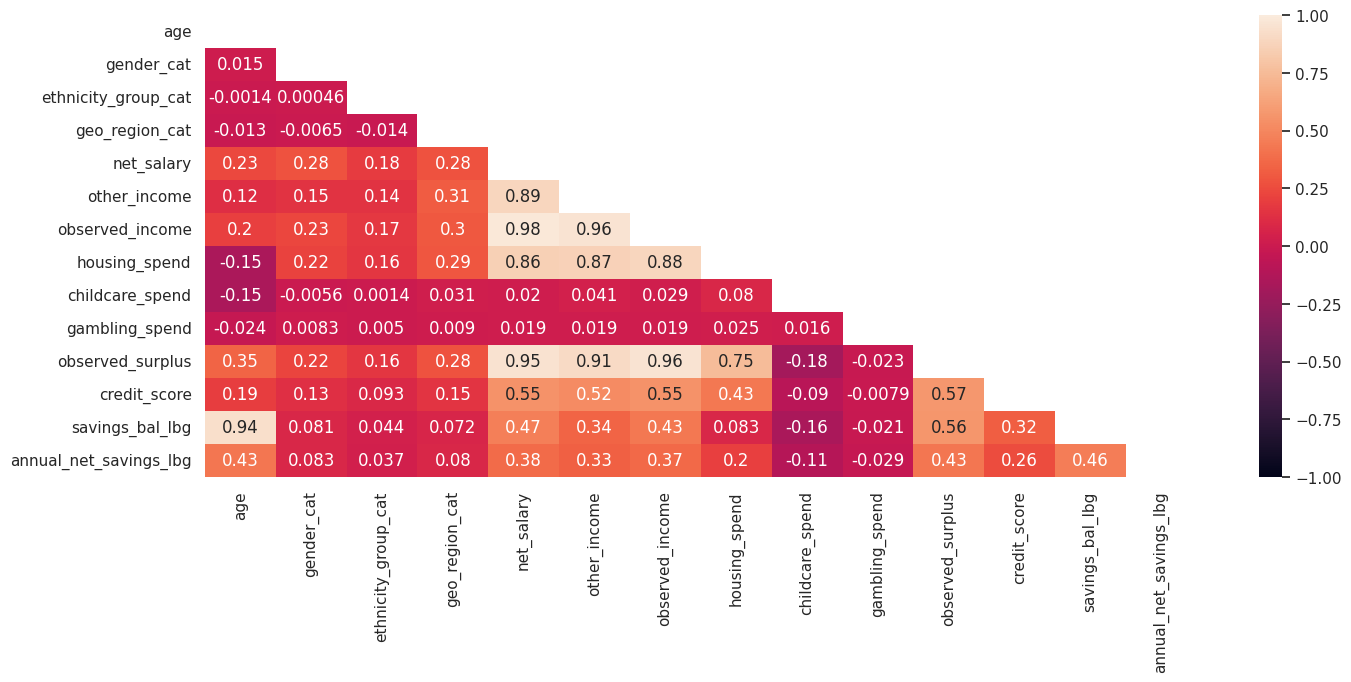

In [24]:
# lets look at the correlation co-efficients
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmin= -1, vmax= 1, annot=True)

Text(0.5, 1.0, 'Feature correlation with net savings')

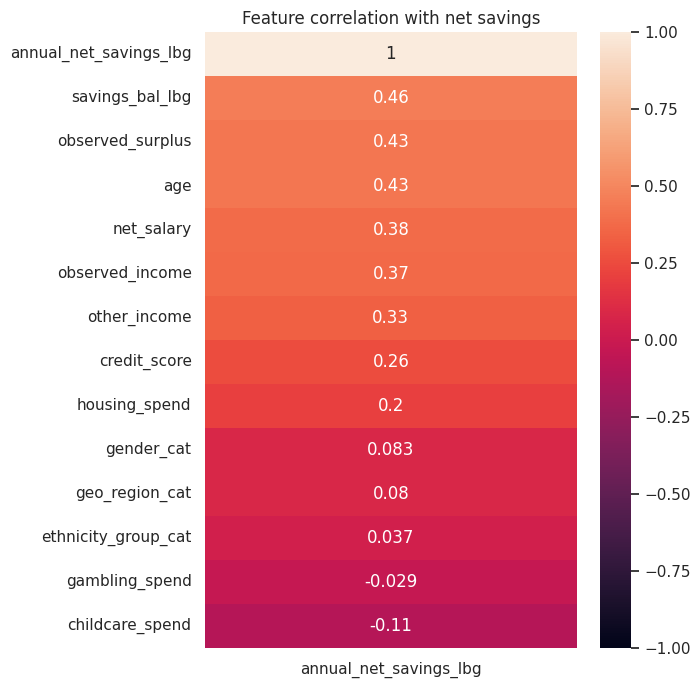

In [25]:
plt.figure(figsize=(6,8))
heatmap = sns.heatmap(df.corr()[['annual_net_savings_lbg']].sort_values(by='annual_net_savings_lbg', ascending=False), vmin= -1, vmax= 1, annot=True)
heatmap.set_title('Feature correlation with net savings')

Text(0.5, 1.0, 'Feature correlation with income')

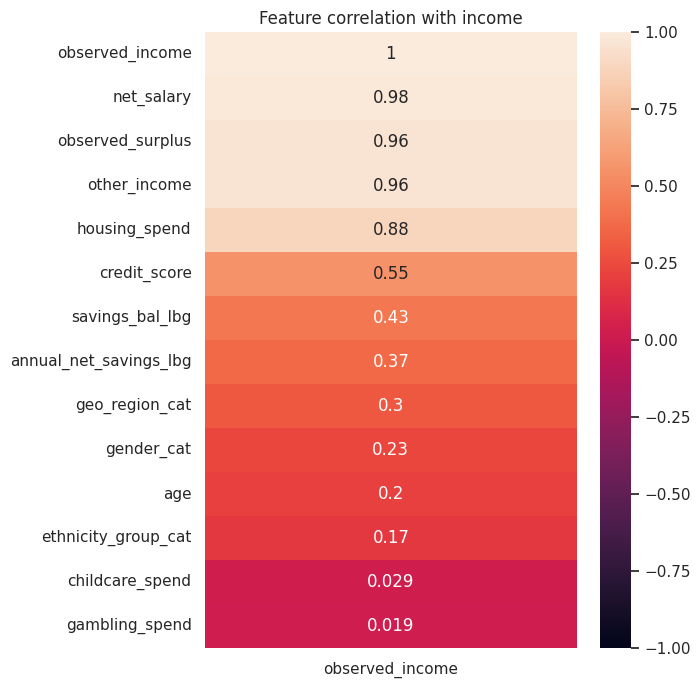

In [26]:
plt.figure(figsize=(6,8))
heatmap = sns.heatmap(df.corr()[['observed_income']].sort_values(by='observed_income', ascending=False), vmin= -1, vmax= 1, annot=True)
heatmap.set_title('Feature correlation with income')